In [ ]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp
from scipy.integrate import simpson, romberg, trapezoid
from scipy.special import roots_legendre
from scipy.optimize import fsolve, bisect, newton, root_scalar

# Actividad 07: Integración

---
### Profesor: Juan Marcos Marín
### Nombre: Isaac Villada
*Métodos computacionales 2024-II*

---

#1
* Implemente una función para el **método de integración de Romberg** definiendo un límite de tolerancia de 1e-8 y/o un máximo de iteraciones de 10.

* Encuentre la integral para

$$\int_0^{\pi/4} dx\, e^{3x}\cdot \sin(x)$$

* Imprima su resultado y compare los valores dados por `scipy.integrate.romberg`

* Finalmente, encuentre el valor del error, hallando el valor exacto usando `sympy`



In [ ]:
f = lambda x: np.exp(3*x) * np.sin(x)

a, b = 0, np.pi/4

def trapezoidal(f, a, b, n):
    h = (b - a) / n
    suma = sum(f(a + i * h) for i in range(1, n))
    integral = (h/2) * (f(a) + 2 * suma + f(b))
    return integral


def romberg2(f, a, b, n_max=10, tol=1e-8):
    A = np.zeros((n_max, n_max))
    n = 1
    A[0, 0] = trapezoidal(f, a, b, n)

    for k in range(1, n_max):
        n *= 2
        A[k, 0] = trapezoidal(f, a, b, n)

        for j in range(1, k + 1):
            A[k, j] = (4**j * A[k, j-1] - A[k-1, j-1]) / (4**j - 1)


        if abs(A[k, k] - A[k-1, k-1]) < tol:
            return A[k, k]

    return A[k, k]

resultado = romberg2(f, a, b)
resultado_alt = romberg(f, a, b)
print("Resultado de la integración con Romberg:", resultado)
print("Resultado de la integración con Romberg Scipy:", resultado)

x = sp.symbols('x')
f = sp.exp(3*x) * sp.sin(x)
f_i = sp.integrate(f, (x, a, b))

error = abs(f_i.evalf() - resultado)
print('error:', error)

<ipython-input-2-8053306bb28f>:31: DeprecationWarning: `scipy.integrate.romberg` is deprecated as of SciPy 1.12.0and will be removed in SciPy 1.15.0. Please use`scipy.integrate.quad` instead.
  resultado_alt = romberg(f, a, b)


Resultado de la integración con Romberg: 1.592097707858613
Resultado de la integración con Romberg Scipy: 1.592097707858613
error: 6.61692922676593e-14


#2

* Usando los *métodos trapezoidal compuesto*, *simpson 1/3* y de *medio punto* encuentre la siguiente integral,

$$\int_e^{1+e} dx\, \frac{1}{x\ln x}$$

* Luego, haga un estudio de la convergencia en términos del valor de $h$ o de los sub-intervalos de la función. ¿Cuál es mejor?


integral trapezoidal 0.2726585180886651
integral simpson 0.2725141807832367


'\nSe aprecia en la gráfica de Simpson vs trapezoidal que Simpson tiene una\nestabilidad mucho mayor a lo largo de el aumento de n.\n\n'

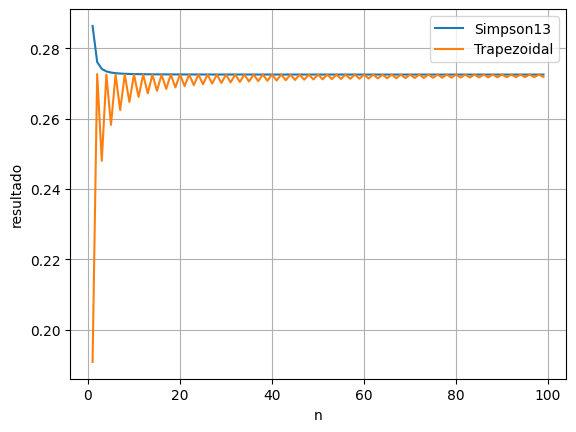

In [ ]:
f = lambda x : 1 / (x * np.log(x))
a,b = np.e, 1 + np.e

i_trap = trapezoidal(f, a, b, 10)

def simpson13(f, a, b, n):
  '''
  f: función a integrar
  a: límite inferior
  b: límite superior
  n: número de intervalos
  return: valor de la integral
  '''
  h = (b - a) / n
  integral = (f(a) + f(b))
  # Suma de los términos impares
  for i in range(1, n, 2):
    x_i = a + i * h
    integral += 4 * f(x_i)
  # Suma de los términos pares
  for i in range(2, n, 2):
    x_i = a + i * h
    integral += 2 * f(x_i)
  return integral * h/3

i_simpson13 = simpson13(f, a, b, 10)

print('integral trapezoidal', i_trap)
print('integral simpson', i_simpson13)

x_vals = []
y_vals_trap = []
y_vals_simp = []

for i in range(1, 100) :

  x_vals.append(i)
  y_vals_simp.append(trapezoidal(f, a, b, i))
  y_vals_trap.append(simpson13(f, a, b, i))

plt.plot(x_vals, y_vals_simp, label = 'Simpson13')
plt.plot(x_vals, y_vals_trap, label = 'Trapezoidal')
plt.xlabel('n')
plt.ylabel('resultado')
plt.legend()
plt.grid(True)

'''
Se aprecia en la gráfica de Simpson vs trapezoidal que Simpson tiene una
estabilidad mucho mayor a lo largo de el aumento de n.

'''

#3
Usando la siguiente función:



```python
def gauss_quad_standard(func, n):
    """
    Calcula la integral de una función en el intervalo [-1, 1]
    utilizando cuadratura gaussiana.

    Parameters:
    - func: La función a integrar.
    - n: Número de puntos para la cuadratura (grado del polinomio de Legendre).

    Returns:
    - Aproximación de la integral.
    """
    # Obtener raíces y pesos del polinomio de Legendre
    x, w = roots_legendre(n)

    # Evaluar la suma ponderada
    integral = np.sum(w * func(x))
    return integral
```

Modifique la función `gauss_quad_standard` de forma tal que no este restringida para $[-1,1]$ sino para cualquier intervalo $[a,b]$. Luego, encuentre la integral del *punto 2*.





In [ ]:
def gauss_quad_standard(func, a, b, n):
    """
    Calcula la integral de una función en el intervalo [-1, 1]
    utilizando cuadratura gaussiana.

    Parameters:
    - func: La función a integrar.
    - n: Número de puntos para la cuadratura (grado del polinomio de Legendre).

    Returns:
    - Aproximación de la integral.
    """
    # Obtener raíces y pesos del polinomio de Legendre
    x, w = roots_legendre(n)

    t = 0.5 * (b - a) * x + 0.5 * (a + b)

    # Evaluar la suma ponderada
    integral = 0.5 * (b - a) * np.sum(w * func(t))
    return integral

print(gauss_quad_standard(f, a, b, 10))

0.27251388050258335


#4

Encuentra todas las raices para los polinomios de grado 3 y 4 de **Legendre** usando el Método de la Secante y Newton-Raphson.



```python
import sympy as sp
x = sp.Symbol('x')

# Polinomio de Legendre de grado n
Pn = sp.legendre(n, x)

```

y calcule los pesos $w_i$ de la cuadratura mediante la fórmula:
   $$
   w_i = \frac{2}{(1 - x_i^2) \left[P_n'(x_i)\right]^2},
   $$
   donde $P_n'(x)$ es la derivada del polinomio de Legendre $P_n(x)$.


raices del polinomio de grado 3 con Newton-Raphson -0.7745966692414835 -4.963083675318166e-24 0.7745966692414833
raices del polinomio de grado 3 con secante -0.7745966692414833 1.5159171931259006e-17 0.7745966692414833
raices del polinomio de grado 4 con Newton-Raphson -0.861136311594053 -0.33998104358485626 0.33998104358485626 0.8611363115940526
raices del polinomio de grado 4 con secante -0.8611363115940527 -0.33998104358485765 0.3399810435848561 0.8611363115940526
pesos de P_tres 45.00000000000008 4.5 44.99999999999996
pesos de P_cuatro 127.6650387970271 0.9063897744022072 0.9063897744022072


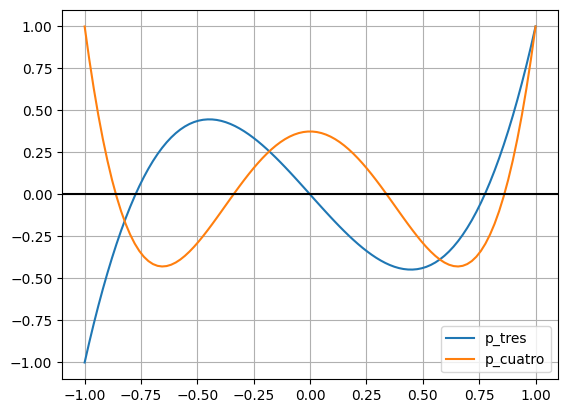

In [13]:
x = sp.Symbol('x')

# Polinomio de Legendre de grado n
p_tres = sp.legendre(3, x)
p_cuatro = sp.legendre(4, x)

p_tres_prima = sp.diff(p_tres, x)
p_cuatro_prima = sp.diff(p_cuatro, x)

p_tres_prima = sp.lambdify(x, p_tres_prima, 'numpy')
p_cuatro_prima = sp.lambdify(x, p_cuatro_prima, 'numpy')

p_tres = sp.lambdify(x, p_tres, 'numpy')
p_cuatro = sp.lambdify(x, p_cuatro, 'numpy')

x_vals = np.linspace(-1, 1, 100)

r_tres_newton_1, r_tres_newton_2, r_tres_newton_3 = newton(p_tres, -1, p_tres_prima), newton(p_tres, -0.25, p_tres_prima), newton(p_tres, 0.75, p_tres_prima)

print('raices del polinomio de grado 3 con Newton-Raphson',
      r_tres_newton_1, r_tres_newton_2, r_tres_newton_3)

r_tres_secante_1 = root_scalar(p_tres, x0=-1, method='secant').root
r_tres_secante_2 = root_scalar(p_tres, x0=-0.25, method='secant').root
r_tres_secante_3 = root_scalar(p_tres, x0=0.75, method='secant').root

print('raices del polinomio de grado 3 con secante',
      r_tres_secante_1, r_tres_secante_2, r_tres_secante_3)

r_cuatro_newton_1, r_cuatro_newton_2, r_cuatro_newton_3, r_cuatro_newton_4 = newton(p_cuatro, -1, p_cuatro_prima), newton(p_cuatro, -0.5, p_cuatro_prima), newton(p_cuatro, 0.25, p_cuatro_prima), newton(p_cuatro, 0.75, p_cuatro_prima)

print('raices del polinomio de grado 4 con Newton-Raphson',
      r_cuatro_newton_1, r_cuatro_newton_2, r_cuatro_newton_3, r_cuatro_newton_4)

r_cuatro_secante_1 = root_scalar(p_cuatro, x0=-1, method='secant').root
r_cuatro_secante_2 = root_scalar(p_cuatro, x0=-0.5, method='secant').root
r_cuatro_secante_3 = root_scalar(p_cuatro, x0=0.25, method='secant').root
r_cuatro_secante_4 = root_scalar(p_cuatro, x0=0.75, method='secant').root

print('raices del polinomio de grado 4 con secante',
      r_cuatro_secante_1, r_cuatro_secante_2, r_cuatro_secante_3, r_cuatro_secante_4)



w_tres = lambda x : 2 / (1 - x**2) * p_tres_prima(x)**2
w_cuatro = lambda x : 2 / (1 - x**2) * p_cuatro_prima(x)**2

print('pesos de P_tres', w_tres(r_tres_newton_1), w_tres(r_tres_newton_2), w_tres(r_tres_newton_3))
print('pesos de P_cuatro', w_tres(r_cuatro_newton_1), w_tres(r_cuatro_newton_2), w_tres(r_cuatro_newton_3))

plt.plot(x_vals, p_tres(x_vals), label = 'p_tres')
plt.plot(x_vals, p_cuatro(x_vals), label = 'p_cuatro')
plt.grid(True)
plt.legend()
plt.axhline(0, color = 'black')
